# K Arm Bandit 

![title](k_arm_bandit_pic.png)

# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Greedy Action Function

In [2]:
def greedy(q_vals, epsilon):
    
    # Randomly select action with probability epsilon
    if np.random.uniform() < epsilon:
        g_action = np.random.choice(actions)
        
    # Select the best action for the given state with probability 1-epsilon
    else:
        q_vals_max = np.where(q_vals==q_vals.max())[0]
        g_action = np.random.choice(q_vals_max)
    
    return g_action

# Bandit Function

In [3]:
def bandit(probs, episodes, epsilon):
    
    # Number of times each action is taken
    n_table = np.zeros(len(probs))

    # Expected reward for each action
    q_table = np.zeros(len(probs))

    # The reward for each episode
    reward = []

    # The action taken each episode 
    each_action = []
    
    # Binary matrix of actions taken for each episode
    action_mat = np.zeros([episodes, len(probs)])

    # Play the Bandit with RL
    for i in range(episodes):
    
        # Find which action to take - Exploration vs Exploitation
        new_action = greedy(q_table, epsilon)
    
        # Save the action selection for each episode
        each_action.append(new_action)
        
        # Save the action for each arm across episodes in a binary matrix
        action_mat[i, new_action] += 1
    
        # Count number of times each action is selected
        n_table[new_action] += 1
    
        # Save the reward recieved for each epsiode
        reward.append( np.random.binomial(n=1, p=probs[new_action], size=1)[0] )
    
        # Update the expected reward for each action 
        q_table[new_action] = q_table[new_action] + ( (1/n_table[new_action]) * ( reward[-1] - q_table[new_action] ) )
        
    # Return the goods
    return n_table, q_table, reward, each_action, action_mat

# Play the Bandit with RL

In [4]:
# Set seed
np.random.seed(802)

# Probability for each bandit arm
probs = [0.10, 0.20, 0.25, 0.30, 0.45, 0.50, 0.55, 0.70, 0.80, 0.85]

# Number of bandit arms
actions = range(len(probs))

# Exploration rate
epsilon = 0.10

# Number of bandit episodes
episodes = 5000

In [5]:
# Play the Bandit
n_table, q_table, reward, each_action, action_mat = bandit(probs, episodes, epsilon)

# View Results

In [6]:
print("The average reward recieved is", sum(reward)/len(reward), "for", episodes, "episodes.")

The average reward recieved is 0.8 for 5000 episodes.


In [7]:
pd.DataFrame({"Bandit Arm":range(len(probs)), "Number of Actions":n_table, \
              "True Probability":probs, "Expected Reward":q_table.round(2)})

,Bandit Arm,Number of Actions,True Probability,Expected Reward
0,0,50.0,0.10,0.16
1,1,38.0,0.20,0.05
2,2,50.0,0.25,0.24
3,3,42.0,0.30,0.21
4,4,54.0,0.45,0.46
5,5,56.0,0.50,0.50
6,6,71.0,0.55,0.48
7,7,47.0,0.70,0.60
8,8,1356.0,0.80,0.80
9,9,3236.0,0.85,0.86


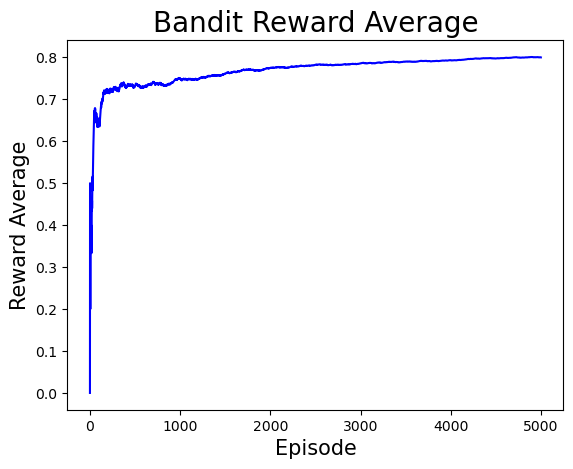

In [8]:
reward_ave = np.cumsum(reward) / (np.array(range(episodes))+1)
plt.plot(reward_ave, color="blue")
plt.title("Bandit Reward Average", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Reward Average", fontsize=15)
plt.show()

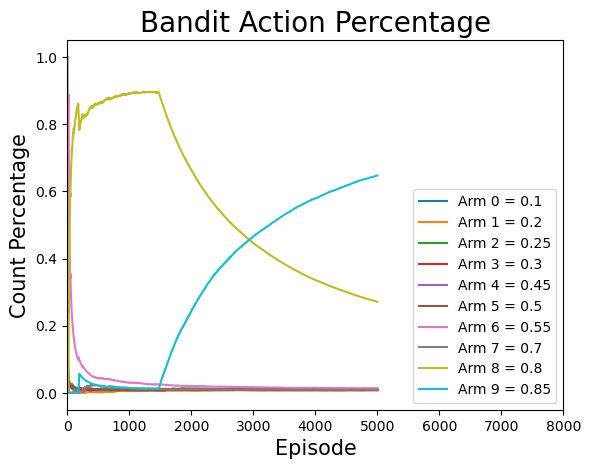

In [9]:
for i in range(len(probs)):
    
    action_counts = action_mat[:,i]
    count_perc = np.cumsum(action_counts) / (np.array(range(episodes))+1)
    plt.plot(count_perc, label="Arm "+str(i)+" = "+str(probs[i]))

plt.title("Bandit Action Percentage", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Count Percentage", fontsize=15)
plt.xlim(0,8000)
plt.legend(loc="lower right")
plt.show()

# View Long Term Behavior

In [10]:
# Set seed
np.random.seed(802)

# Number of bandit episodes
episodes = 500

# Number of experiments to play the bandit
experiments = 1000

In [11]:
# Reward sum for each episdoe across experiments
reward_experiment = np.zeros(episodes)

# Matrix of actions taken for each episode and summed across experiments 
action_mat_experiment = np.zeros([episodes, len(probs)])

# Run the experiment
for experiment in range(experiments):
    
    # Play the Bandit
    n_table, q_table, reward, each_action, action_mat = bandit(probs, episodes, epsilon)
    
    # Add rewards to array for each experiment
    reward_experiment += np.array(reward)
    
    # Sum action matrices across experiments
    action_mat_experiment += action_mat
    
    # Print experiment iterations
    if (experiment+1) % 100 == 0:
        print("Experiment", experiment+1)

Experiment 100
Experiment 200
Experiment 300
Experiment 400
Experiment 500
Experiment 600
Experiment 700
Experiment 800
Experiment 900
Experiment 1000


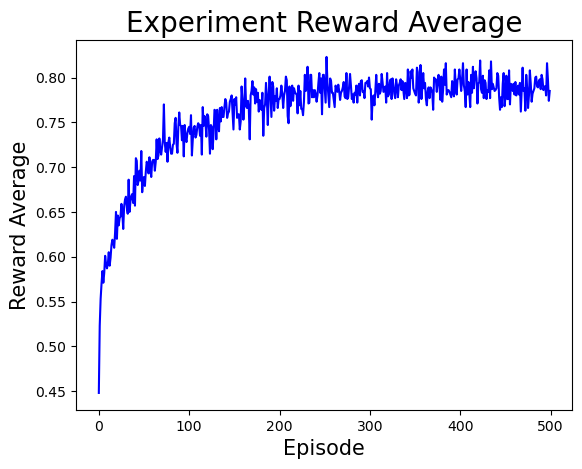

In [12]:
reward_ave = reward_experiment / experiments
plt.plot(reward_ave, color="blue")
plt.title("Experiment Reward Average", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Reward Average", fontsize=15)
plt.show()

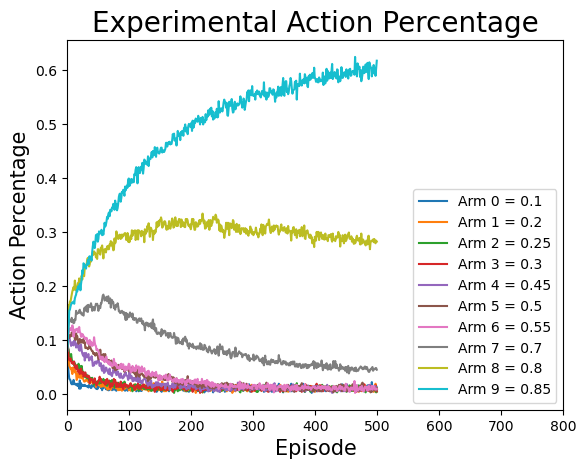

In [13]:
for i in range(len(probs)):

    action_perc = action_mat_experiment[:,i] / experiments
    plt.plot(action_perc, label="Arm "+str(i)+" = "+str(probs[i]))

plt.title("Experimental Action Percentage", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Action Percentage", fontsize=15)
plt.xlim(0,800)
plt.legend(loc="lower right")
plt.show()

# Vary Epsilon in Simulation

In [14]:
# Set seed
np.random.seed(802)

# Exploration rates
epsilon_set = [0.01,0.10,0.20]

In [15]:
# Rewards for each exploration set
reward_epsilon_experiment = []

for eps in epsilon_set:
    
    # Reward sum for each episdoe across experiments
    reward_experiment = np.zeros(episodes)

    # Run the experiment
    for experiment in range(experiments):
    
        # Play the Bandit
        n_table, q_table, reward, each_action, action_mat = bandit(probs, episodes, eps)
    
        # Add rewards to array for each experiment
        reward_experiment += np.array(reward)
    
        # Print experiment iterations
        if (experiment+1) % 100 == 0:
            print("Epsilon", eps, "Experiment", experiment+1)
            
    # Save reward arrays for each epsilon
    reward_epsilon_experiment.append(reward_experiment)

Epsilon 0.01 Experiment 100
Epsilon 0.01 Experiment 200
Epsilon 0.01 Experiment 300
Epsilon 0.01 Experiment 400
Epsilon 0.01 Experiment 500
Epsilon 0.01 Experiment 600
Epsilon 0.01 Experiment 700
Epsilon 0.01 Experiment 800
Epsilon 0.01 Experiment 900
Epsilon 0.01 Experiment 1000
Epsilon 0.1 Experiment 100
Epsilon 0.1 Experiment 200
Epsilon 0.1 Experiment 300
Epsilon 0.1 Experiment 400
Epsilon 0.1 Experiment 500
Epsilon 0.1 Experiment 600
Epsilon 0.1 Experiment 700
Epsilon 0.1 Experiment 800
Epsilon 0.1 Experiment 900
Epsilon 0.1 Experiment 1000
Epsilon 0.2 Experiment 100
Epsilon 0.2 Experiment 200
Epsilon 0.2 Experiment 300
Epsilon 0.2 Experiment 400
Epsilon 0.2 Experiment 500
Epsilon 0.2 Experiment 600
Epsilon 0.2 Experiment 700
Epsilon 0.2 Experiment 800
Epsilon 0.2 Experiment 900
Epsilon 0.2 Experiment 1000


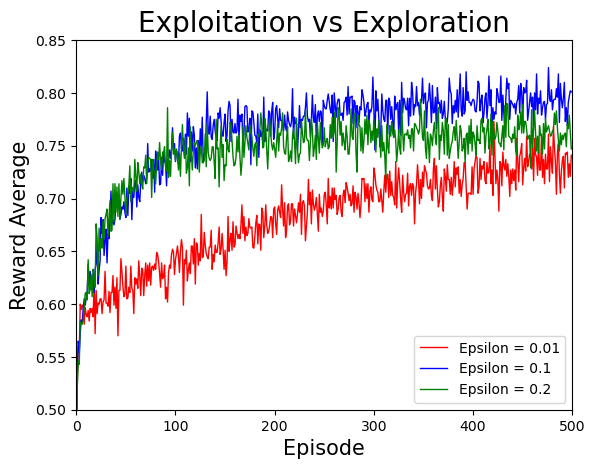

In [16]:
colors = ["red", "blue", "green"]
for i in range(len(epsilon_set)):
    
    reward_ave = reward_epsilon_experiment[i] / experiments
    plt.plot(reward_ave, label="Epsilon = "+str(epsilon_set[i]), linewidth=1, color=colors[i])
    
plt.title("Exploitation vs Exploration", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Reward Average", fontsize=15)
plt.xlim(0,episodes)
plt.ylim(0.50,0.85)
plt.legend(loc="lower right")
plt.show()